In [1]:
import pandas as pd
import numpy as np
from vega_datasets import data 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("imdb.csv",error_bad_lines=False)
df.dropna()
df.head()

Skipping line 66: expected 44 fields, saw 46
Skipping line 111: expected 44 fields, saw 45
Skipping line 198: expected 44 fields, saw 45
Skipping line 222: expected 44 fields, saw 46
Skipping line 278: expected 44 fields, saw 45
Skipping line 396: expected 44 fields, saw 45
Skipping line 403: expected 44 fields, saw 45
Skipping line 421: expected 44 fields, saw 45
Skipping line 437: expected 44 fields, saw 45
Skipping line 462: expected 44 fields, saw 46
Skipping line 491: expected 44 fields, saw 45
Skipping line 515: expected 44 fields, saw 45
Skipping line 529: expected 44 fields, saw 45
Skipping line 530: expected 44 fields, saw 45
Skipping line 558: expected 44 fields, saw 45
Skipping line 623: expected 44 fields, saw 45
Skipping line 646: expected 44 fields, saw 45
Skipping line 663: expected 44 fields, saw 46
Skipping line 713: expected 44 fields, saw 45
Skipping line 730: expected 44 fields, saw 47
Skipping line 791: expected 44 fields, saw 45
Skipping line 813: expected 44 fiel

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [3]:
df.drop(["fn","tid","url"],inplace=True,axis="columns")
df.head()

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550.0,3240.0,1921.0,video.movie,1,0,19,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319.0,5700.0,1925.0,video.movie,2,1,35,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007.0,9180.0,1927.0,video.movie,3,4,67,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521.0,6420.0,1926.0,video.movie,1,1,53,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057.0,5220.0,1931.0,video.movie,2,0,38,...,0,0,1,0,0,0,0,0,0,0


In [4]:
df["type"] = df["type"].apply(lambda x: x.split(".")[-1])

In [5]:
df.head()

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,Der Vagabund und das Kind (1921),der vagabund und das kind,8.4,40550.0,3240.0,1921.0,movie,1,0,19,...,0,0,0,0,0,0,0,0,0,0
1,Goldrausch (1925),goldrausch,8.3,45319.0,5700.0,1925.0,movie,2,1,35,...,0,0,0,0,0,0,0,0,0,0
2,Metropolis (1927),metropolis,8.4,81007.0,9180.0,1927.0,movie,3,4,67,...,0,0,0,1,0,0,0,0,0,0
3,Der General (1926),der general,8.3,37521.0,6420.0,1926.0,movie,1,1,53,...,0,0,0,0,0,0,0,0,0,0
4,Lichter der Großstadt (1931),lichter der gro stadt,8.7,70057.0,5220.0,1931.0,movie,2,0,38,...,0,0,1,0,0,0,0,0,0,0


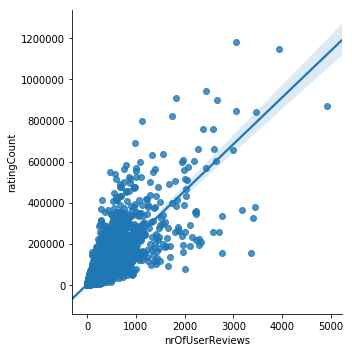

In [6]:
sns.lmplot(data=df,y="ratingCount",x="nrOfUserReviews");

# This plot shows the correlation between # of reviews and rating count for the films
# This makes sense as more the number of reviews the more the rting count
# The correlation is of 0.831018

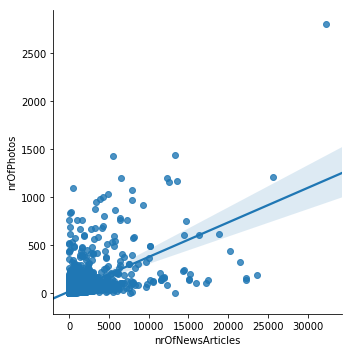

In [7]:
sns.lmplot(data=df,y="nrOfPhotos",x="nrOfNewsArticles");

# The plot shows the correlation between # of articles and # of Photos
# This makes sense as the more the # of articles are published the more the number of photos will be published of the films
# The correlation is of 0.580460

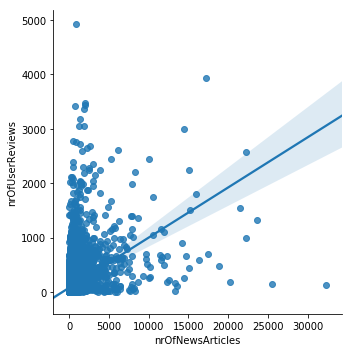

In [8]:
sns.lmplot(data=df,y="nrOfUserReviews",x="nrOfNewsArticles");

# This plot shows the correlation between # of Reviews posted and # of New articles published
# This shows that the more the famous the film is in terms of news articles the more reviews will it get on IMDB
# The correlation is of 0.423773

Text(3.675,0.5,'# of Wins')

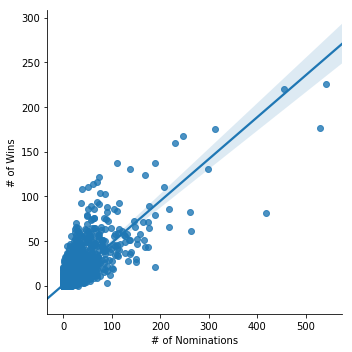

In [9]:
sns.lmplot(data=df,y="nrOfWins",x="nrOfNominations");
plt.xlabel("# of Nominations")
plt.ylabel("# of Wins")
# This plot shows the correlation between # of nominations and # of wins
# This makes sensen as the more the # of nominations for a film the more the # of chances of it winning the films
# The correlation is of 0.809314

In [10]:
df.corr()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
imdbRating,1.000000,0.157123,0.000858,-0.107314,0.197062,0.135746,0.078678,0.078427,0.079959,0.001231,...,-0.045055,-0.036285,0.003291,-0.102694,-0.016165,-0.006592,-0.015867,-0.076001,0.073522,-0.000743
ratingCount,0.157123,1.000000,0.180304,0.164508,0.414537,0.330706,0.347098,0.529461,0.831018,0.132811,...,-0.025098,-0.030690,-0.009509,0.088624,-0.072893,0.002926,-0.042970,0.137019,-0.024016,-0.034353
duration,0.000858,0.180304,1.000000,-0.075876,0.127717,0.041520,0.040104,0.052902,0.223824,0.175598,...,-0.040871,-0.085396,0.144202,-0.001796,-0.312701,0.064382,-0.107973,0.101905,0.092375,0.047702
year,-0.107314,0.164508,-0.075876,1.000000,0.075403,0.085599,0.098310,0.128161,0.108644,-0.054659,...,0.068692,0.066918,-0.135134,0.010785,-0.043079,0.018446,0.139722,0.037637,-0.133561,-0.163798
nrOfWins,0.197062,0.414537,0.127717,0.075403,1.000000,0.809314,0.277551,0.362361,0.382080,0.053600,...,-0.018600,-0.015195,0.051949,-0.028716,-0.056848,-0.004723,-0.050113,0.013873,0.025062,-0.027909
nrOfNominations,0.135746,0.330706,0.041520,0.085599,0.809314,1.000000,0.386560,0.427917,0.305801,0.048158,...,-0.009707,-0.003071,0.028680,-0.009280,-0.055012,-0.006851,-0.030457,0.003368,-0.006660,-0.026715
nrOfPhotos,0.078678,0.347098,0.040104,0.098310,0.277551,0.386560,1.000000,0.580460,0.312814,0.110653,...,-0.034923,0.080254,0.021995,0.035187,-0.067562,0.005257,-0.064619,0.035375,-0.017545,-0.015940
nrOfNewsArticles,0.078427,0.529461,0.052902,0.128161,0.362361,0.427917,0.580460,1.000000,0.423773,0.086810,...,-0.014924,0.048703,-0.011057,0.066902,-0.046238,-0.004946,-0.027164,0.048455,-0.026237,-0.021975
nrOfUserReviews,0.079959,0.831018,0.223824,0.108644,0.382080,0.305801,0.312814,0.423773,1.000000,0.163832,...,-0.046730,-0.037823,0.012641,0.122319,-0.083378,0.000646,-0.085064,0.164584,-0.009352,-0.024541
nrOfGenre,0.001231,0.132811,0.175598,-0.054659,0.053600,0.048158,0.110653,0.086810,0.163832,1.000000,...,-0.034571,-0.050858,0.192342,0.124434,0.004069,0.052850,-0.046543,0.161375,0.098833,-0.043300


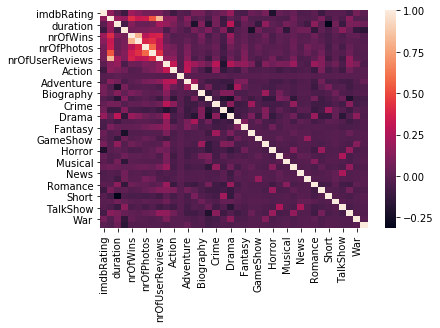

In [11]:
sns.heatmap(df.corr())

# This is a graphical representation of the above table

In [12]:
post_1990 = df[df["year"]>=1990.0]
post_1990.head()

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
125,GoodFellas - Drei Jahrzehnte in der Mafia (1990),goodfellas drei jahrzehnte in der mafia,8.8,515242.0,8760.0,1990.0,movie,40,23,68,...,0,0,0,0,0,0,0,0,0,0
126,Die Schöne und das Biest (1991),die sch ne und das biest,8.1,208331.0,5040.0,1991.0,movie,21,19,81,...,0,0,0,0,0,0,0,0,0,0
127,Das Schweigen der Lämmer (1991),das schweigen der l mmer,8.6,584102.0,7080.0,1991.0,movie,44,30,80,...,0,0,0,0,0,0,0,1,0,0
128,Terminator 2 - Tag der Abrechnung (1991),terminator tag der abrechnung,8.5,523543.0,8220.0,1991.0,movie,20,19,71,...,0,0,0,1,0,0,0,1,0,0
129,Reservoir Dogs - Wilde Hunde (1992),reservoir dogs wilde hunde,8.4,454684.0,5940.0,1992.0,movie,11,9,72,...,0,0,0,0,0,0,0,1,0,0


c:\python27\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\python27\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


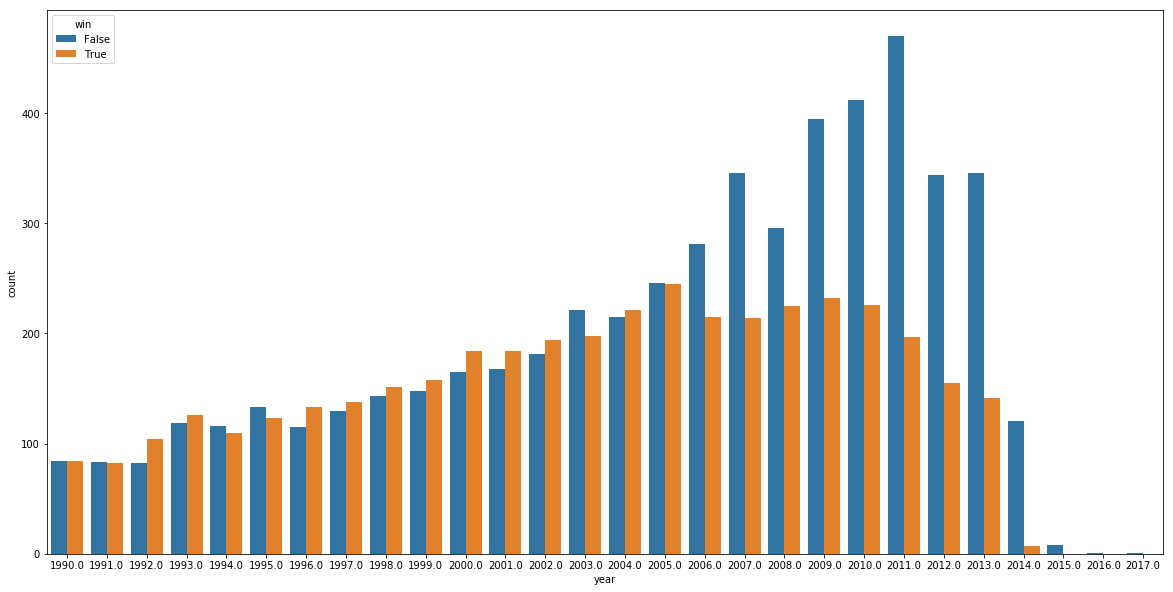

In [13]:
post_1990.loc[:,"win"] = np.NaN
post_1990.loc[df["nrOfWins"]>=1,"win"] = True
post_1990.loc[df["nrOfWins"]<1,"win"] = False
post_1990.head()
plt.figure(figsize=(20,10))
sns.countplot(data=post_1990,x="year",hue="win");

# # of movies that won and did not win awards post 1990s

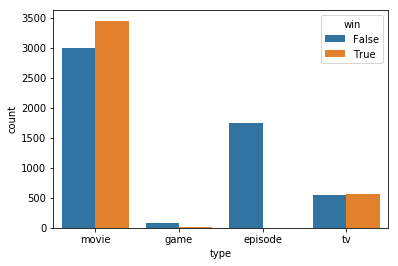

In [14]:
sns.countplot(data=post_1990,x="type",hue="win");

# # of type of contents released post 1990s

In [15]:
df.columns[12:]

Index([u'nrOfGenre', u'Action', u'Adult', u'Adventure', u'Animation',
       u'Biography', u'Comedy', u'Crime', u'Documentary', u'Drama', u'Family',
       u'Fantasy', u'FilmNoir', u'GameShow', u'History', u'Horror', u'Music',
       u'Musical', u'Mystery', u'News', u'RealityTV', u'Romance', u'SciFi',
       u'Short', u'Sport', u'TalkShow', u'Thriller', u'War', u'Western'],
      dtype='object')

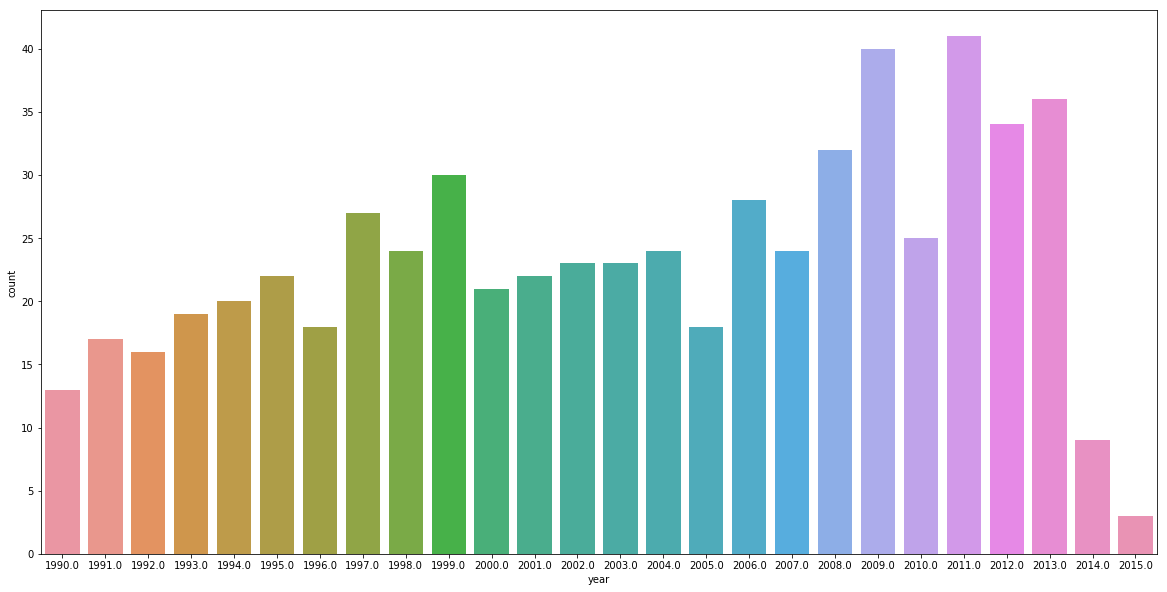

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(data=post_1990[post_1990["SciFi"]==1],x="year");

# This plots shows type of content for Category SciFi released post 1990
# In the mid 2000s SciFi content reduced and picked up pace from 2005 onwards
# Prior to 2000s as well the # of SciFi related content was soaring

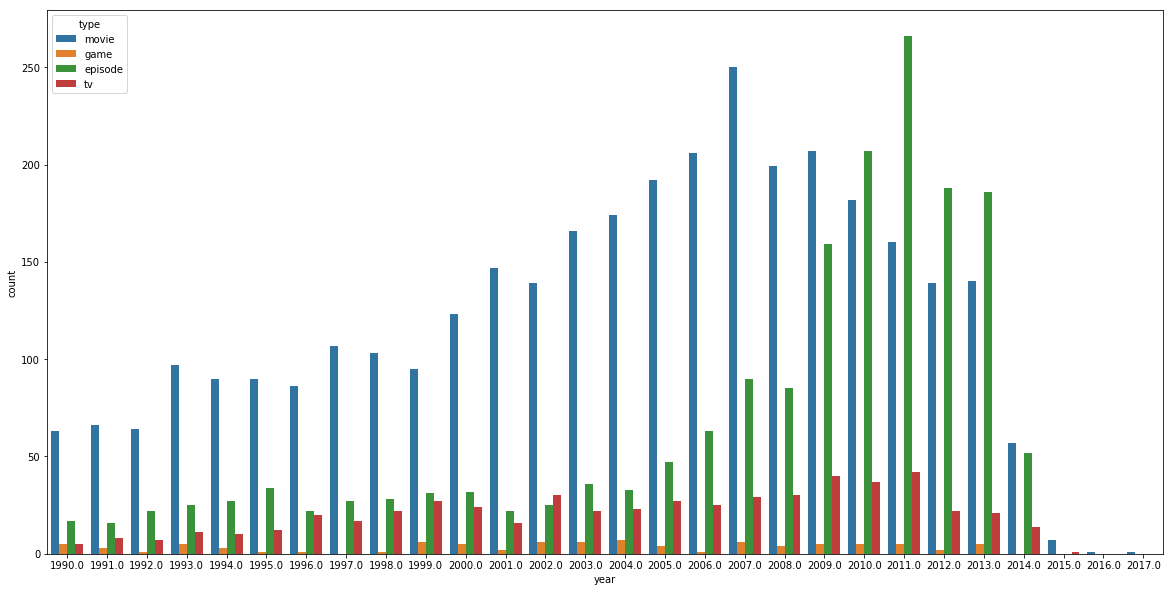

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data=post_1990,x=post_1990[post_1990["nrOfNominations"]<1]["year"],hue="type");

# This plot shows the # of movies that did not get nominated even once split across type of content

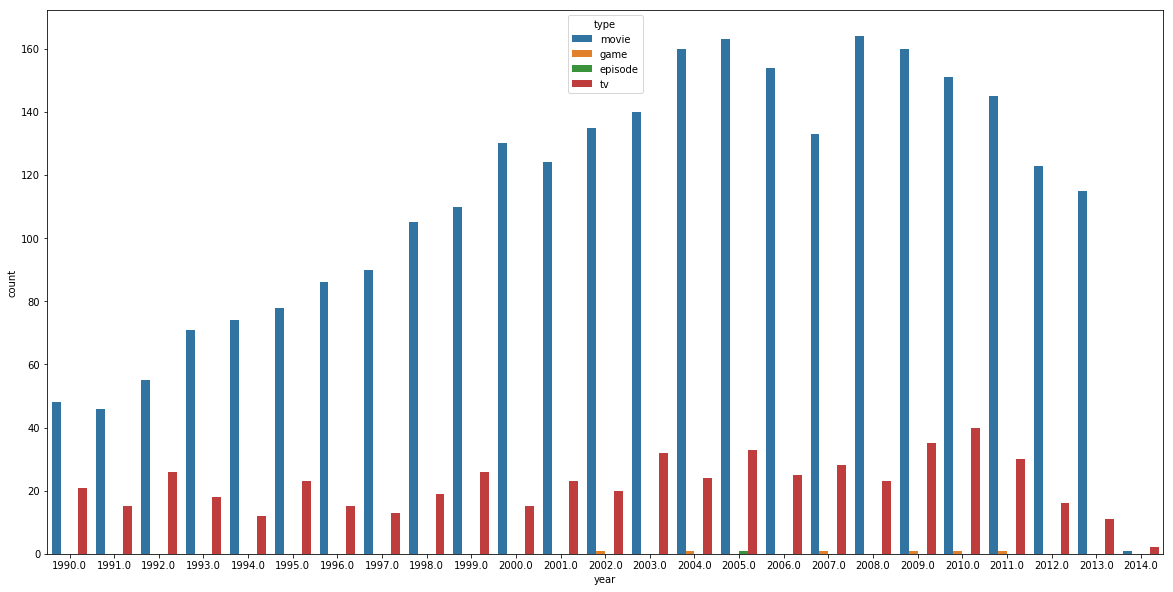

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data=post_1990,x=post_1990[post_1990["nrOfNominations"]>1]["year"],hue="type");

# This plot shows the # of movies that did not get nominated at least once split across type of content
# This is interesting to see that a lot of episodes and game did not get enough nominations

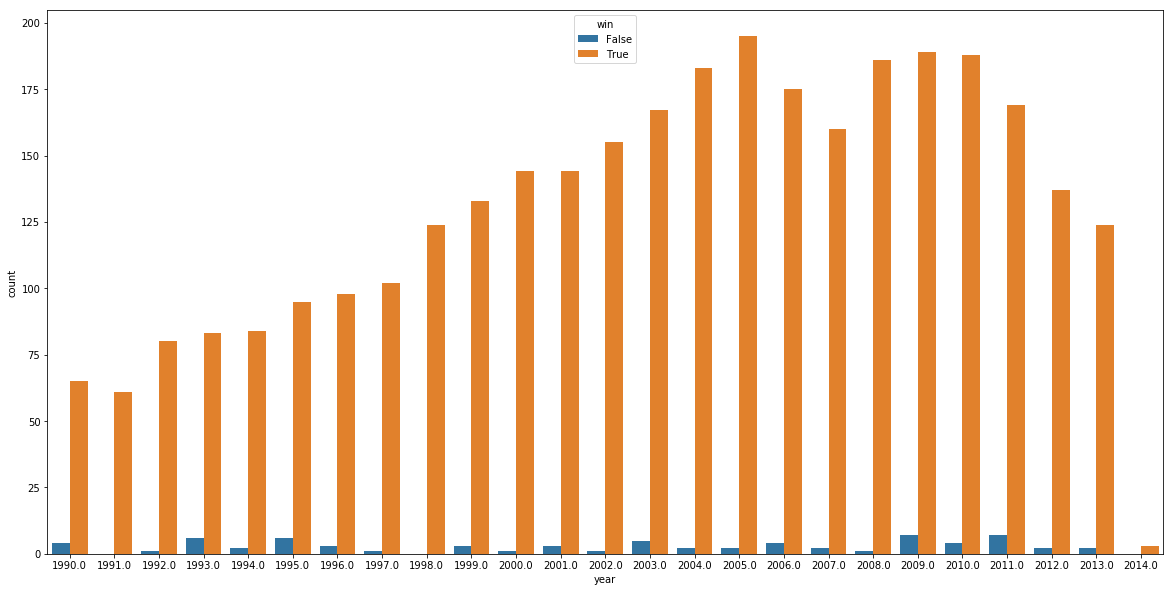

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(data=post_1990,x=post_1990[post_1990["nrOfNominations"]>1]["year"],hue="win");

# This plot shows the # of movies that did not get nominated at least once split across win
# It appears most of the films which were nominated atleast once won their respective award

In [21]:
average_ratings = pd.pivot_table(data=post_1990,index="year",columns="type",values=["imdbRating"])
average_ratings
# Average rating split across type of content and years
# It's intresting to see that in year 1997 & 2014 no content of game type was released

imdbRating                              
type      episode      game     movie        tv
year                                           
1990.0   7.490909  6.760000  6.520000  7.320000
1991.0   7.878571  8.566667  6.620492  6.900000
1992.0   7.760000  6.700000  6.721094  6.920588
1993.0   7.765217  7.940000  6.623497  7.348276
1994.0   7.730435  7.566667  6.459064  7.891667
1995.0   7.557143  7.700000  6.545055  7.252778
1996.0   7.593333  7.300000  6.376064  7.191892
1997.0   8.033333       NaN  6.517788  6.922581
1998.0   7.686364  8.300000  6.548649  7.081395
1999.0   7.721739  7.750000  6.573832  7.335294
2000.0   7.740909  7.883333  6.515530  6.948718
2001.0   7.266667  8.433333  6.571731  7.356757
2002.0   7.373684  8.116667  6.570139  7.065306
2003.0   7.527586  6.900000  6.575000  7.480357
2004.0   7.746429  8.012500  6.516374  7.270833
2005.0   7.630000  6.725000  6.550674  7.270000
2006.0   7.715000  7.800000  6.722074  7.346000
2007.0   7.643478  8.266667  6.626753  7.422034
2008.0   6.754167  7.350000  6.533243  7.375926
2009.0   7.653623  8.620000  6.532275  7.131081
2010.0   7.644595  8.266667  6.547892  7.370270
2011.0   7.569298  7.983333  6.550987  7.508451
2012.0   7.551948  8.700000  6.617829  7.100000
2013.0   7.738961  8.683333  6.635124  7.744828
2014.0   7.772727       NaN  6.631707  7.430769

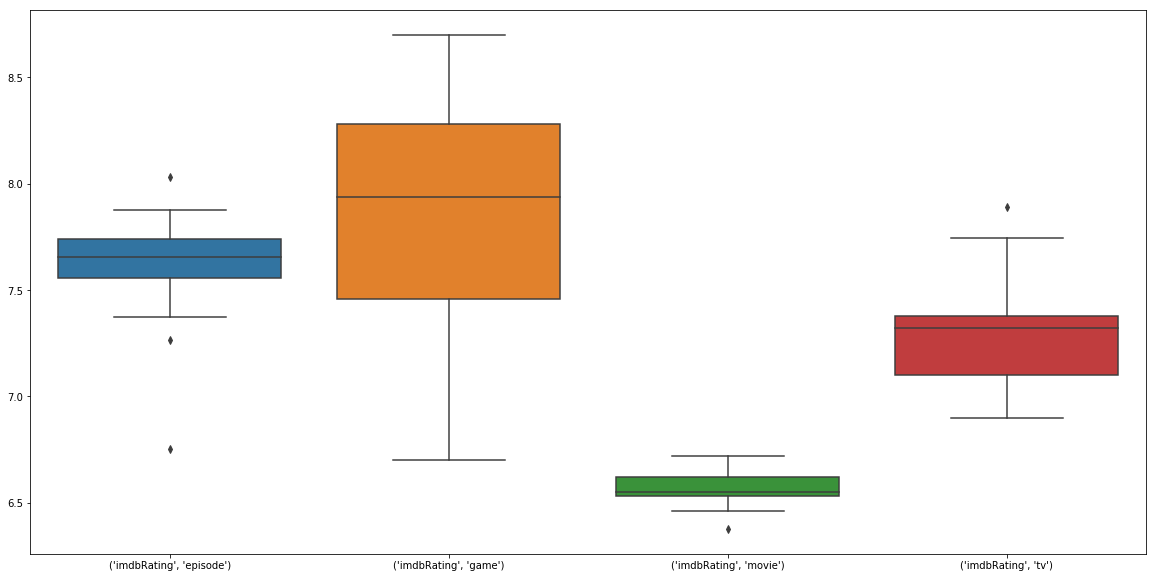

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data=average_ratings);

# The plots shows the average rating across various content types

In [23]:
post_1990["Average"] = np.nan
post_1990.head()

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,win,Average
125,GoodFellas - Drei Jahrzehnte in der Mafia (1990),goodfellas drei jahrzehnte in der mafia,8.8,515242.0,8760.0,1990.0,movie,40,23,68,...,0,0,0,0,0,0,0,0,True,NaN
126,Die Schöne und das Biest (1991),die sch ne und das biest,8.1,208331.0,5040.0,1991.0,movie,21,19,81,...,0,0,0,0,0,0,0,0,True,NaN
127,Das Schweigen der Lämmer (1991),das schweigen der l mmer,8.6,584102.0,7080.0,1991.0,movie,44,30,80,...,0,0,0,0,0,1,0,0,True,NaN
128,Terminator 2 - Tag der Abrechnung (1991),terminator tag der abrechnung,8.5,523543.0,8220.0,1991.0,movie,20,19,71,...,0,1,0,0,0,1,0,0,True,NaN
129,Reservoir Dogs - Wilde Hunde (1992),reservoir dogs wilde hunde,8.4,454684.0,5940.0,1992.0,movie,11,9,72,...,0,0,0,0,0,1,0,0,True,NaN


In [24]:
post_1990.loc[post_1990["imdbRating"]>=post_1990["imdbRating"].mean(),"Average"] = "Above"
post_1990.loc[post_1990["imdbRating"]<=post_1990["imdbRating"].mean(),"Average"] = "Below"

In [25]:
post_1990.head()

,title,wordsInTitle,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,...,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,win,Average
125,GoodFellas - Drei Jahrzehnte in der Mafia (1990),goodfellas drei jahrzehnte in der mafia,8.8,515242.0,8760.0,1990.0,movie,40,23,68,...,0,0,0,0,0,0,0,0,True,Above
126,Die Schöne und das Biest (1991),die sch ne und das biest,8.1,208331.0,5040.0,1991.0,movie,21,19,81,...,0,0,0,0,0,0,0,0,True,Above
127,Das Schweigen der Lämmer (1991),das schweigen der l mmer,8.6,584102.0,7080.0,1991.0,movie,44,30,80,...,0,0,0,0,0,1,0,0,True,Above
128,Terminator 2 - Tag der Abrechnung (1991),terminator tag der abrechnung,8.5,523543.0,8220.0,1991.0,movie,20,19,71,...,0,1,0,0,0,1,0,0,True,Above
129,Reservoir Dogs - Wilde Hunde (1992),reservoir dogs wilde hunde,8.4,454684.0,5940.0,1992.0,movie,11,9,72,...,0,0,0,0,0,1,0,0,True,Above


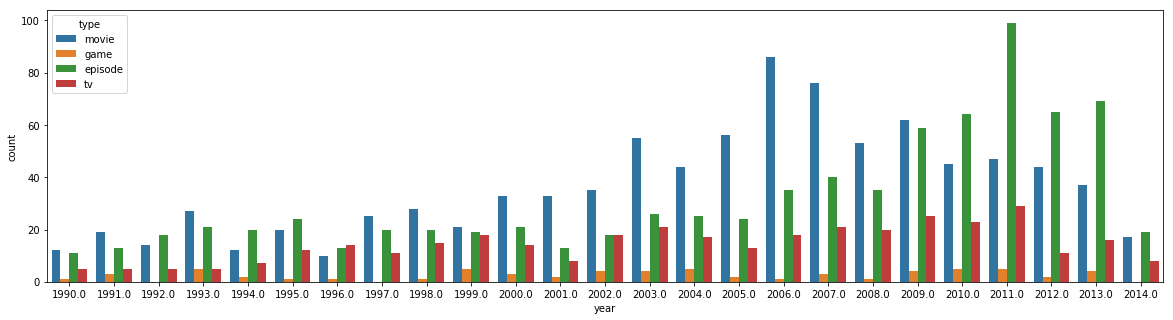

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(data=post_1990[(post_1990["Average"]=="Above") & (post_1990["win"]==False)],x="year",hue="type");

# This plot shows the content which has above average imdbRating but did not win any award split across type
# It seems like post 2005 a lot of episodes had more than above average imdbRating but they did not win any awards
# Post 2006 the # of films which had above average imdbRating and did not win awards reduced

Text(0,0.5,'# of Content')

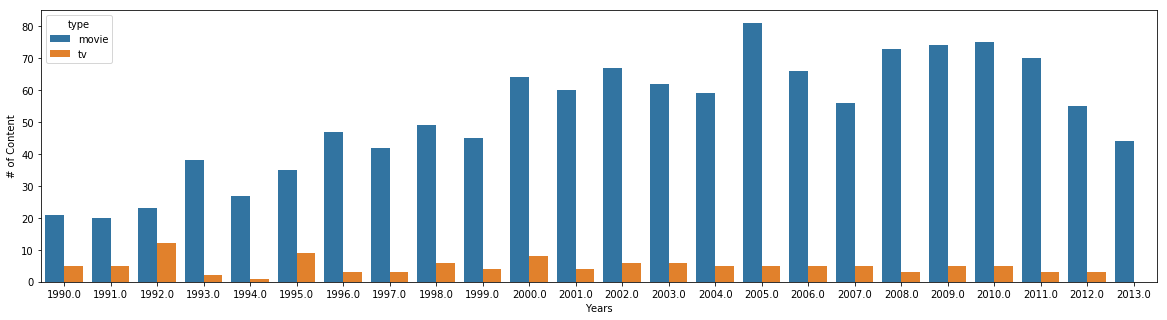

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(data=post_1990[(post_1990["Average"]=="Below") & (post_1990["win"]==True)],x="year",hue="type");
plt.xlabel("Years")
plt.ylabel("# of Content")
# This plot shows the content which has below average imdbRating and won at least 1 award split across type
# It's intresting to see that only movie and tv type is here
# Episode and Game are not here